# 머신러닝 기본 개념
![](https://i.imgur.com/mqb8VVO.png)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 분류 (Classification)
- 어떤 대상을 정해진 범주에 구분해 넣는 작업
- **주어진 특성에 따라 어떤 대상을 범주(target)로 구분하는 방법**
    - 레이블 또는 타겟이 범주형일때 사용
- 범주가 2개인 경우 **이진 분류 (Binary Classification)**
- 범주가 세개 이상인 경우 **다중 분류 (MultiClass Classification)**

In [10]:
# 분류 데이터 불러오기
import pandas as pd
df = pd.read_csv('data/breast_cancer.csv')
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625          0.2364                  0.076

In [13]:
df.isna().sum() #결측치 조회

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [15]:
df.dtypes #데이터 타입조회

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [16]:
# 특성 추출 [행, 열]
X = df.iloc[:, :-1]
X

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [7]:
# 레이블 추출
Y = df.iloc[:, -1]
Y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [8]:
# 데이터 분할 (학습 및 평가)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [61]:
# 모델 생성 및 학습
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(x_train, y_train)

In [62]:
# 모델 정확도 확인
rf.score(x_train, y_train), rf.score(x_test, y_test)

(1.0, 0.972027972027972)

# 분류 모델 평가 지표

In [63]:
# 실제값 확인
y_test.values

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [64]:
# 예측값 확인
p_test = rf.predict(x_test)
p_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

## 정확도
- 실제값과 예측값이 얼마나 일치하는지 비율
- (TP + TN) / (TP + FP + FN + TN)

In [65]:
# 정확도
from sklearn.metrics import accuracy_score
accuracy_score(y_test, p_test)

0.972027972027972

## 혼동행렬
![](https://i.imgur.com/E4djUzb.png)

In [66]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, p_test).ravel()
tn, fp, fn, tp

(52, 1, 3, 87)

## 정밀도 (precision)
- 양성으로 예측한 값(TP+FP)중 실제 양성 값(TP)의 비율
    - 양성 예측의 정확도 
- TP / (TP + FP)

In [67]:
# 정밀도
from sklearn.metrics import recall_score
recall_score(y_test, p_test)

0.9666666666666667

## 재현율 (recall)
- 실제 양성값(TP+FN)중 양성으로 잘 예측한 값(TP)의 비율
- TP / (TP + FN)
- 민감도(sensitivity), 참 양성 비율 (true positive rate)라고도 함

In [68]:
# 재현율
from sklearn.metrics import precision_score
precision_score(y_test, p_test)

0.9886363636363636

## F1 Score
- 정밀도와 재현율의 조화평균
    - 정밀도와 재현율을 동시에 사용할때 사용
- 2 * (precision x recall) / (precision + recall)

In [69]:
# F1-Score
from sklearn.metrics import f1_score
f1_score(y_test, p_test)

0.9775280898876404

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        53
           1       0.99      0.97      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



## ROC-AUC
- 참 양성 비율(TPR)과 거짓 양성 비율(FPR)을 나타낸 곡선
- AUC는 ROC 곡선의 아랫 면적을 의미

In [71]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, p_test)
fpr, tpr, thresholds

(array([0.        , 0.01886792, 1.        ]),
 array([0.        , 0.96666667, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [72]:
# AUC 계산
from sklearn.metrics import auc
auc_score = auc(fpr, tpr) # RoC Curve를 그리는 요소인 fpr, tpr
auc_score

0.9738993710691825

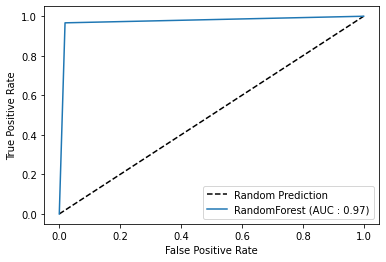

In [73]:
# Roc Curve 시각화
import matplotlib.pyplot as plt
label = "RandomForest (AUC : %.2f)" % auc_score
plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")
plt.plot(fpr, tpr, label=label)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# 회귀 (Regression)
- 독립변수(특성)과 종속변수(레이블)간 관계를 모델링하는 방법
- 레이블 또는  타겟이 연속형일때 사용
- 독립변수와 종속변수의 관계를 기반으로 최적의 회귀 계수를 찾음

In [74]:
# 분류 데이터 불러오기
import pandas as pd
df = pd.read_csv('data/boston.csv')
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   9.14    21.6  
2       17.8  392.83   4.03    34.7  
3       18.7  394.63   2.94    33.4  
4       18.7  396.90   5.33    36.2  
..       ...     ...    ...     ...  
501     21.0  391.99   9.67    22.4  
502     21.0  396.90   9.08    20.6  
503     21.0  396.90   5.64    23.9  
504     21.0  393.45   6.48    22.0  
505     21.0  396.90   7.88    11.9  

[506 rows x 14 columns]

In [ ]:
# 특성 추출
X = df.iloc[:, :-1]

In [88]:
# 특성 추출
X = df.iloc[:, :-1]
X = df.loc[:, 'CRIM':'LSTAT'] # 끝 포함
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
X = df.drop('target', axis=1)
X = df.loc[: , df.columns != 'target']
X

In [91]:
# 레이블 추출
Y = df.iloc[:, -1]
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

In [92]:
# 데이터 분할 (학습 및 평가)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [93]:
# 모델 생성 및 학습
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor().fit(x_train, y_train)

In [94]:
# 모델 정확도 확인
rf.score(x_train, y_train), rf.score(x_test, y_test)

(0.9825758296955616, 0.8012845818434341)

# 회귀 모델 평가 지표

In [95]:
# 실제값 확인
y_test.values

array([22.6, 50. , 23. ,  8.3, 21.2, 19.9, 20.6, 18.7, 16.1, 18.6,  8.8,
       17.2, 14.9, 10.5, 50. , 29. , 23. , 33.3, 29.4, 21. , 23.8, 19.1,
       20.4, 29.1, 19.3, 23.1, 19.6, 19.4, 38.7, 18.7, 14.6, 20. , 20.5,
       20.1, 23.6, 16.8,  5.6, 50. , 14.5, 13.3, 23.9, 20. , 19.8, 13.8,
       16.5, 21.6, 20.3, 17. , 11.8, 27.5, 15.6, 23.1, 24.3, 42.8, 15.6,
       21.7, 17.1, 17.2, 15. , 21.7, 18.6, 21. , 33.1, 31.5, 20.1, 29.8,
       15.2, 15. , 27.5, 22.6, 20. , 21.4, 23.5, 31.2, 23.7,  7.4, 48.3,
       24.4, 22.6, 18.3, 23.3, 17.1, 27.9, 44.8, 50. , 23. , 21.4, 10.2,
       23.3, 23.2, 18.9, 13.4, 21.9, 24.8, 11.9, 24.3, 13.8, 24.7, 14.1,
       18.7, 28.1, 19.8, 26.7, 21.7, 22. , 22.9, 10.4, 21.9, 20.6, 26.4,
       41.3, 17.2, 27.1, 20.4, 16.5, 24.4,  8.4, 23. ,  9.7, 50. , 30.5,
       12.3, 19.4, 21.2, 20.3, 18.8, 33.4])

In [96]:
# 예측값 확인
p_test = rf.predict(x_test)
p_test

array([24.272, 30.284, 22.11 , 10.697, 20.457, 20.859, 21.178, 20.233,
       20.753, 19.135,  8.033, 15.003, 14.717,  8.337, 47.728, 33.837,
       21.156, 34.412, 25.156, 21.325, 23.781, 21.864, 19.865, 24.319,
       20.274, 18.422, 18.651, 16.081, 43.988, 18.644, 14.517, 17.321,
       20.823, 20.661, 23.108, 17.225,  8.028, 30.526, 14.242, 14.369,
       22.877, 20.658, 23.068, 14.646, 23.489, 22.694, 20.008, 16.508,
       14.723, 25.036, 16.622, 19.53 , 21.684, 39.522, 15.004, 19.732,
       19.469, 19.045, 24.337, 20.122, 21.234, 21.167, 32.905, 27.583,
       17.887, 26.377, 15.755, 17.755, 20.099, 21.747, 19.879, 23.054,
       24.162, 31.294, 30.986,  8.372, 42.581, 21.699, 22.969, 20.244,
       26.608, 17.672, 22.898, 41.882, 41.265, 24.368, 23.172, 14.707,
       25.49 , 16.19 , 18.824, 12.178, 22.39 , 29.974, 21.577, 22.107,
       12.37 , 23.181, 14.598, 19.398, 24.101, 19.845, 28.313, 21.179,
       28.423, 19.866,  8.407, 19.233, 21.362, 23.47 , 31.357, 12.678,
      

## R Squared
- 회귀직선의 적합도를 평가하거나 종속변수(레이블)에 대한 독립변수(특성)의 설명력을 알고싶을때 사용

In [98]:
from sklearn.metrics import r2_score
r2_score(p_test, y_test)
# 최악 -inf, 최고 1

0.7213662707778133

## MAE
- 예측값과 실제값의 차이인 오차 절댓값 평균
- 기존 레이블의 단위를 그대로 활용할 수 있음

In [102]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(p_test, y_test)

2.5740472440944897

## MSE
- 예측값과 실제값의 차이인 오차 제곱 평균
- 제곱을 하기 때문에 특이치(아웃라이어)에 민감

In [103]:
from sklearn.metrics import mean_squared_error
mean_squared_error(p_test, y_test)

16.234854015748038

## RMSE
- MSE 지표에 루트를 적용한 결과
- 오류 지표를 실제 값과 유사한 단위로 변환해 해석이 용이해짐

In [104]:
from sklearn.metrics import mean_squared_error
mean_squared_error(p_test, y_test) ** 0.5

4.029249808059564

## MSLE
- MSE방식에 로그를 적용한 것
- 결정 값이 클수록 오류값도 커지기 때문에 일부 큰 오류값들로 인해 전체 오류값이 커지는 것을 막아줌

In [105]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(p_test, y_test)

0.02428535183373342

## RMSLE
- 아웃라이어에 덜 민감함 (robust)
    - 값의 변동폭이 크지 않음
- 상대적 Error를 측정함
    - 예측값 = 100, 실제값 = 90일 때, RMSLE = 0.1053, RMSE = 10
    - 예측값 = 10,000, 실제값 = 9,000일 때, RMSLE = 0.1053, RMSE = 1,000
- Under Estimation에 큰 패널티를 부여

In [32]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(p_test, y_test, squared=False)

0.15788148332339436

# 데이터 인코딩
- 레이블 인코딩 (label encoding)
    - 범주형 데이터를 숫자로 일대일 매핑해주는 인코딩 방식
        - 범주형 데이터를 숫자로 치환
    - scikit-learn의 LabelEncoder로 변환 가능
    - 명목형 데이터를 레이블 인코딩 하는 경우 모델의 성능이 떨어짐
        - 바나나(0)와 사과(2)보다 복숭아(1)와 더 비슷하다고 판단
            - 바나나, 사과, 복숭아는 별개의 데이터임

In [107]:
data = np.array(['사과', '복숭아', '바나나', '키위', '사과', '바나나', '복숭아', '사과'])
data

array(['사과', '복숭아', '바나나', '키위', '사과', '바나나', '복숭아', '사과'], dtype='<U3')

In [108]:
from sklearn.preprocessing import LabelEncoder #직접구현하는것도 생각을 해보기
encoder = LabelEncoder()

data_label = encoder.fit_transform(data)
data_label

array([2, 1, 0, 3, 2, 0, 1, 2], dtype=int64)

- 원-핫 인코딩 (one-hot encoding)
    - 여러 값 중 하나(one)만 True(hot, 1)로 하는 변환 방법
    - scikit-learn의 OneHotEncoder로 변환 가능
    - 변환 과정
        1) 인코딩 하려는 범주의 고윳값 개수를 확인
        2) 범주의 고윳값 개수만큼 열을 추가
        3) 각 고윳값에 해당하는 열에 1을 표시하고 나머지는 0을 표시
    - 레이블 인코딩의 문제를 해결할 수 있음
    - 범주의 개수가 많은 경우 열 개수가 지나치게 많아짐

In [109]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
data_onehot = encoder.fit_transform(data.reshape(-1, 1))
data_onehot.toarray()

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [111]:
# Pandas 활용
pd.get_dummies(data)

바나나  복숭아  사과  키위
0    0    0   1   0
1    0    1   0   0
2    1    0   0   0
3    0    0   0   1
4    0    0   1   0
5    1    0   0   0
6    0    1   0   0
7    0    0   1   0

# 스케일링
- 서로 다른 특성 값의 범위(단위)를 일치하도록 값을 조정하는 방법
    - 값의 범위가 데이터마다 다르면 모델 훈련이 제대로 안 될 수도 있음

## 최소최대정규화 (min max normalization)
- 특성 값 범위를 0(최소) ~ 1(최대)로 조정하는 기법
    - (X - MIN) / (MAX - MIN)

- scikit-learn의 MinMaxScaler로 변환 가능

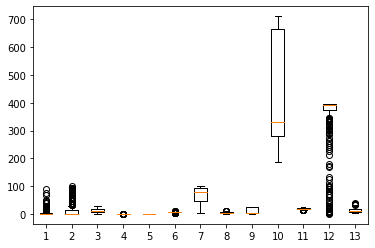

In [112]:
plt.boxplot(X)
plt.show()

In [115]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_Scaled = scaler.fit_transform(X)

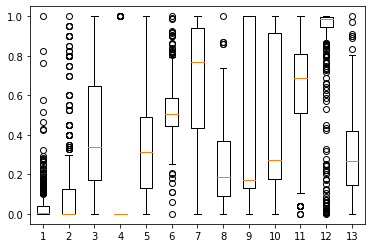

In [116]:
plt.boxplot(X_Scaled)
plt.show()

## 표준화 (standardization)
- 평균이 0, 표준편차가 1이 되도록 조정하는 기법
    - 표준정규분포로 변환
    - (X - MEAN) / STD
- scikit-learn의 StandardScaler로 변환 가능

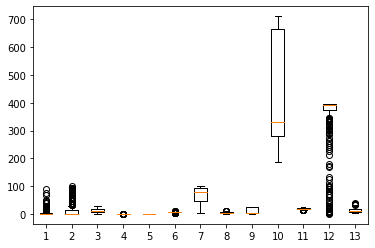

In [117]:
plt.boxplot(X)
plt.show()

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

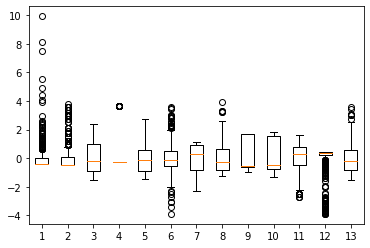

In [119]:
plt.boxplot(X_Scaled)
plt.show()

# 데이터 분할

- 머신러닝을 통해 우리가 하고자 하는것은 **예측**
- 일반적으로 학습데이터로 모델을 학습하고 평가데이터로 모델의 성능을 측정함
    - 평가 데이터 세트가 없는 경우 데이터중 일부를 평가 데이터로 지정
        - train_test_split 함수 이용
- 만약 평가데이터를 이용하지 않는 경우 과대적합이 발생하고 모델 성능 확인이 어려움

In [120]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0) # 셔플 후 데이터 분할
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((379, 13), (379,), (127, 13), (127,))

In [124]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) # 평가데이터 비율 조정
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

# K Fold Cross Validation
1) 전체 데이터를 K개의 그룹으로 나눔

2) 1개의 Fold는 평가 나머지는 학습으로 사용

3) 각각의 Fold가 한번씩 평가데이터로 사용하여 결과를 평균

![](https://i.imgur.com/QxHgiXb.png)

In [122]:
from sklearn.model_selection import KFold
data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [123]:
folds = KFold(n_splits=5, shuffle=False)

for train_index, test_index in folds.split(data):
    print(f'학습 : {data[train_index]}, 평가 : {data[test_index]}')

학습 : [2 3 4 5 6 7 8 9], 평가 : [0 1]
학습 : [0 1 4 5 6 7 8 9], 평가 : [2 3]
학습 : [0 1 2 3 6 7 8 9], 평가 : [4 5]
학습 : [0 1 2 3 4 5 8 9], 평가 : [6 7]
학습 : [0 1 2 3 4 5 6 7], 평가 : [8 9]


In [47]:
folds = KFold(n_splits=5, shuffle=True)
for train_index, test_index in folds.split(data):
    print(f'학습 : {data[train_index]}, 평가 : {data[test_index]}')

학습 : [0 1 2 4 6 7 8 9], 평가 : [3 5]
학습 : [0 2 3 4 5 7 8 9], 평가 : [1 6]
학습 : [1 3 4 5 6 7 8 9], 평가 : [0 2]
학습 : [0 1 2 3 5 6 7 8], 평가 : [4 9]
학습 : [0 1 2 3 4 5 6 9], 평가 : [7 8]
